# creditcard data 

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.model_selection import GridSearchCV
from   sklearn.linear_model import LogisticRegression
from   sklearn.metrics import confusion_matrix
from   sklearn.metrics import precision_score,recall_score,f1_score

In [33]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
df.shape

(284807, 31)

In [35]:
X =  df.drop(columns=['Time','Amount','Class'])
y = df['Class']

In [36]:
y.value_counts()
# Zero means not Fraud
# one means fraud

0    284315
1       492
Name: Class, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(class_weight={0:1,1:2})
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [47]:
yp =lr.predict(X)

In [48]:
# convertion data into DataFrame for reading
df_pred = pd.DataFrame(yp)

In [49]:
df_pred.value_counts()

0    284370
1       437
dtype: int64

In [51]:
lr.get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
 # 0 means less signifacance ,1 :2 more signifacanc
grid =GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={"class_weight": [{0:1,1:number} for number in range(1,10)]},
    cv =5
)


In [70]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]})

In [85]:
predicted_y = grid.predict(X)

In [90]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.166936,2.058910,0.013258,0.003159,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998999,0.999315,0.998947,0.999298,0.999017,0.999115,0.000158,9
1,3.247934,0.337880,0.011660,0.002812,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999034,0.999421,0.999017,0.999298,0.999175,0.999189,0.000154,7
2,3.209016,0.201213,0.013500,0.003877,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999052,0.999491,0.998964,0.999421,0.999210,0.999228,0.000204,4
3,4.391847,0.359030,0.015788,0.001529,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.998999,0.999544,0.998982,0.999438,0.999280,0.999249,0.000227,1
4,4.223849,0.136238,0.018006,0.003031,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.998964,0.999526,0.999017,0.999438,0.999280,0.999245,0.000223,3
5,4.174444,0.281238,0.018944,0.002917,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.998964,0.999579,0.998982,0.999438,0.999280,0.999249,0.000244,1
6,5.292514,1.176942,0.022118,0.004013,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.998964,0.999596,0.998912,0.999473,0.999192,0.999228,0.000271,5
7,4.926570,0.947938,0.020805,0.006969,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.998929,0.999649,0.998841,0.999438,0.999192,0.999210,0.000303,6
8,4.234329,0.389820,0.020864,0.006033,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.998894,0.999649,0.998718,0.999368,0.999192,0.999164,0.000331,8


In [91]:
df_pred1 =pd.DataFrame(predicted_y)

In [92]:
df_pred1.value_counts()

0    284331
1       476
dtype: int64

In [95]:
# Actual verses machine prediction
precision_score(y,predicted_y)

0.8109243697478992

In [97]:
recall_score(y,predicted_y)

0.7845528455284553

In [105]:
# difference b/w precession_score and recall_score() harmonics meanof boht is called f1_score)
# good precesion and good recall score then f1_score get good
# easy to understand it is the combination of precession_score and recall_score is called f1_score
f1_score(y,predicted_y)

0.7975206611570248

In [108]:
# Confusion Matrix
confusion_matrix(y,predicted_y)

array([[284225,     90],
       [   106,    386]], dtype=int64)

<AxesSubplot: >

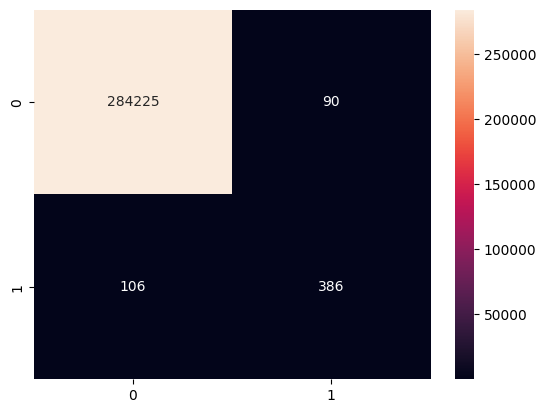

In [110]:
sns.heatmap(confusion_matrix(y,predicted_y),annot=True,fmt='d')